###Import the libraries

In [444]:
!pip install catboost

In [445]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostClassifier

###Get the data

In [446]:
music = pd.read_csv('/content/train (1).csv')

###Discover and visualize the data

In [447]:
music.head()

,Id,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,1,Marina Maximilian,Not Afraid,37.0,0.334,0.536,9.0,-6.649,0,0.0381,0.378000,NaN,0.106,0.235,152.429,204947.0,4,9
1,2,The Black Keys,Howlin' for You,67.0,0.725,0.747,11.0,-5.545,1,0.0876,0.027200,0.0468,0.104,0.380,132.921,191956.0,4,6
2,3,Royal & the Serpent,phuck u,NaN,0.584,0.804,7.0,-6.094,1,0.0619,0.000968,0.6350,0.284,0.635,159.953,161037.0,4,10
3,4,Detroit Blues Band,Missing You,12.0,0.515,0.308,NaN,-14.711,1,0.0312,0.907000,0.0213,0.300,0.501,172.472,298093.0,3,2
4,5,Coast Contra,My Lady,48.0,0.565,0.777,6.0,-5.096,0,0.2490,0.183000,NaN,0.211,0.619,88.311,254145.0,4,5


In [448]:
music.shape

(14396, 18)

In [449]:
music.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14396 entries, 0 to 14395
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  14396 non-null  int64  
 1   Artist Name         14396 non-null  object 
 2   Track Name          14396 non-null  object 
 3   Popularity          14063 non-null  float64
 4   danceability        14396 non-null  float64
 5   energy              14396 non-null  float64
 6   key                 12787 non-null  float64
 7   loudness            14396 non-null  float64
 8   mode                14396 non-null  int64  
 9   speechiness         14396 non-null  float64
 10  acousticness        14396 non-null  float64
 11  instrumentalness    10855 non-null  float64
 12  liveness            14396 non-null  float64
 13  valence             14396 non-null  float64
 14  tempo               14396 non-null  float64
 15  duration_in min/ms  14396 non-null  float64
 16  time

In [450]:
music.describe()

,Id,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
count,14396.000000,14063.000000,14396.000000,14396.000000,12787.000000,14396.000000,14396.000000,14396.000000,14396.000000,10855.000000,14396.000000,14396.000000,14396.000000,1.439600e+04,14396.000000,14396.000000
mean,7198.500000,44.525208,0.543105,0.662422,5.953781,-7.900852,0.640247,0.080181,0.246746,0.178129,0.195782,0.486379,122.695372,2.000942e+05,3.924354,6.695679
std,4155.911573,17.418940,0.165517,0.235967,3.200013,4.057362,0.479944,0.085157,0.310922,0.304266,0.159258,0.239476,29.538490,1.116891e+05,0.359520,3.206170
min,1.000000,1.000000,0.059600,0.001210,1.000000,-39.952000,0.000000,0.022500,0.000000,0.000001,0.011900,0.021500,30.557000,5.016500e-01,1.000000,0.000000
25%,3599.750000,33.000000,0.432000,0.508000,3.000000,-9.538000,0.000000,0.034800,0.004280,0.000088,0.097275,0.299000,99.799000,1.654458e+05,4.000000,5.000000
50%,7198.500000,44.000000,0.545000,0.699000,6.000000,-7.013500,1.000000,0.047100,0.081450,0.003920,0.129000,0.480500,120.060000,2.089410e+05,4.000000,8.000000
75%,10797.250000,56.000000,0.658000,0.861000,9.000000,-5.162000,1.000000,0.083100,0.432250,0.201000,0.256000,0.672000,141.988250,2.522470e+05,4.000000,10.000000
max,14396.000000,100.000000,0.989000,1.000000,11.000000,1.342000,1.000000,0.955000,0.996000,0.996000,0.992000,0.986000,217.416000,1.477187e+06,5.000000,10.000000


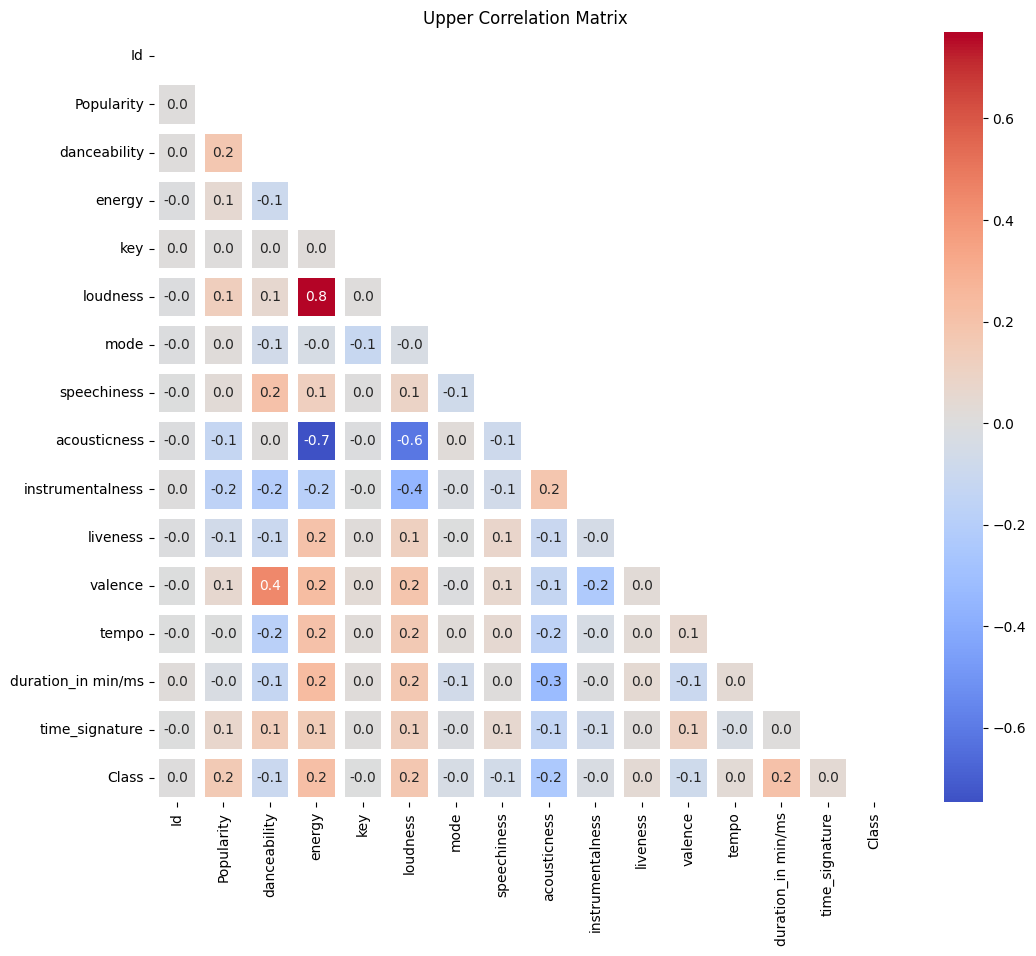

In [451]:
corr_matrix = music.corr(numeric_only=True)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', mask=mask, center=0, fmt=".1f", linewidths=6)
plt.title('Upper Correlation Matrix')
plt.show()

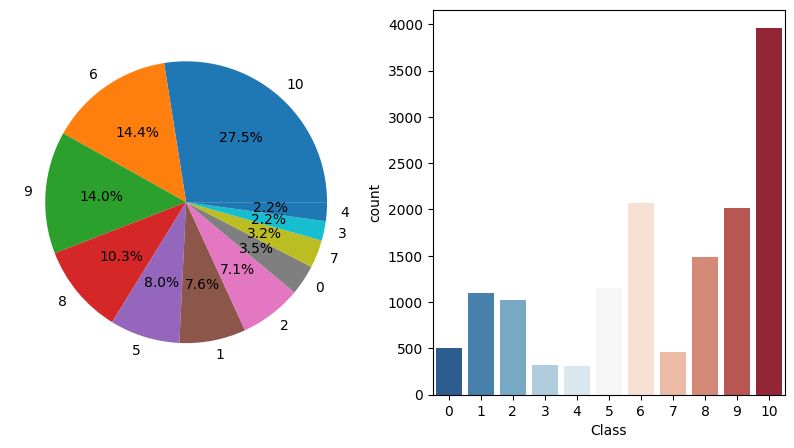

In [452]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].pie(music.Class.value_counts(), labels=music.Class.value_counts().index, autopct='%.1f%%')
sns.countplot(x='Class', data=music, palette='RdBu_r')
plt.show()

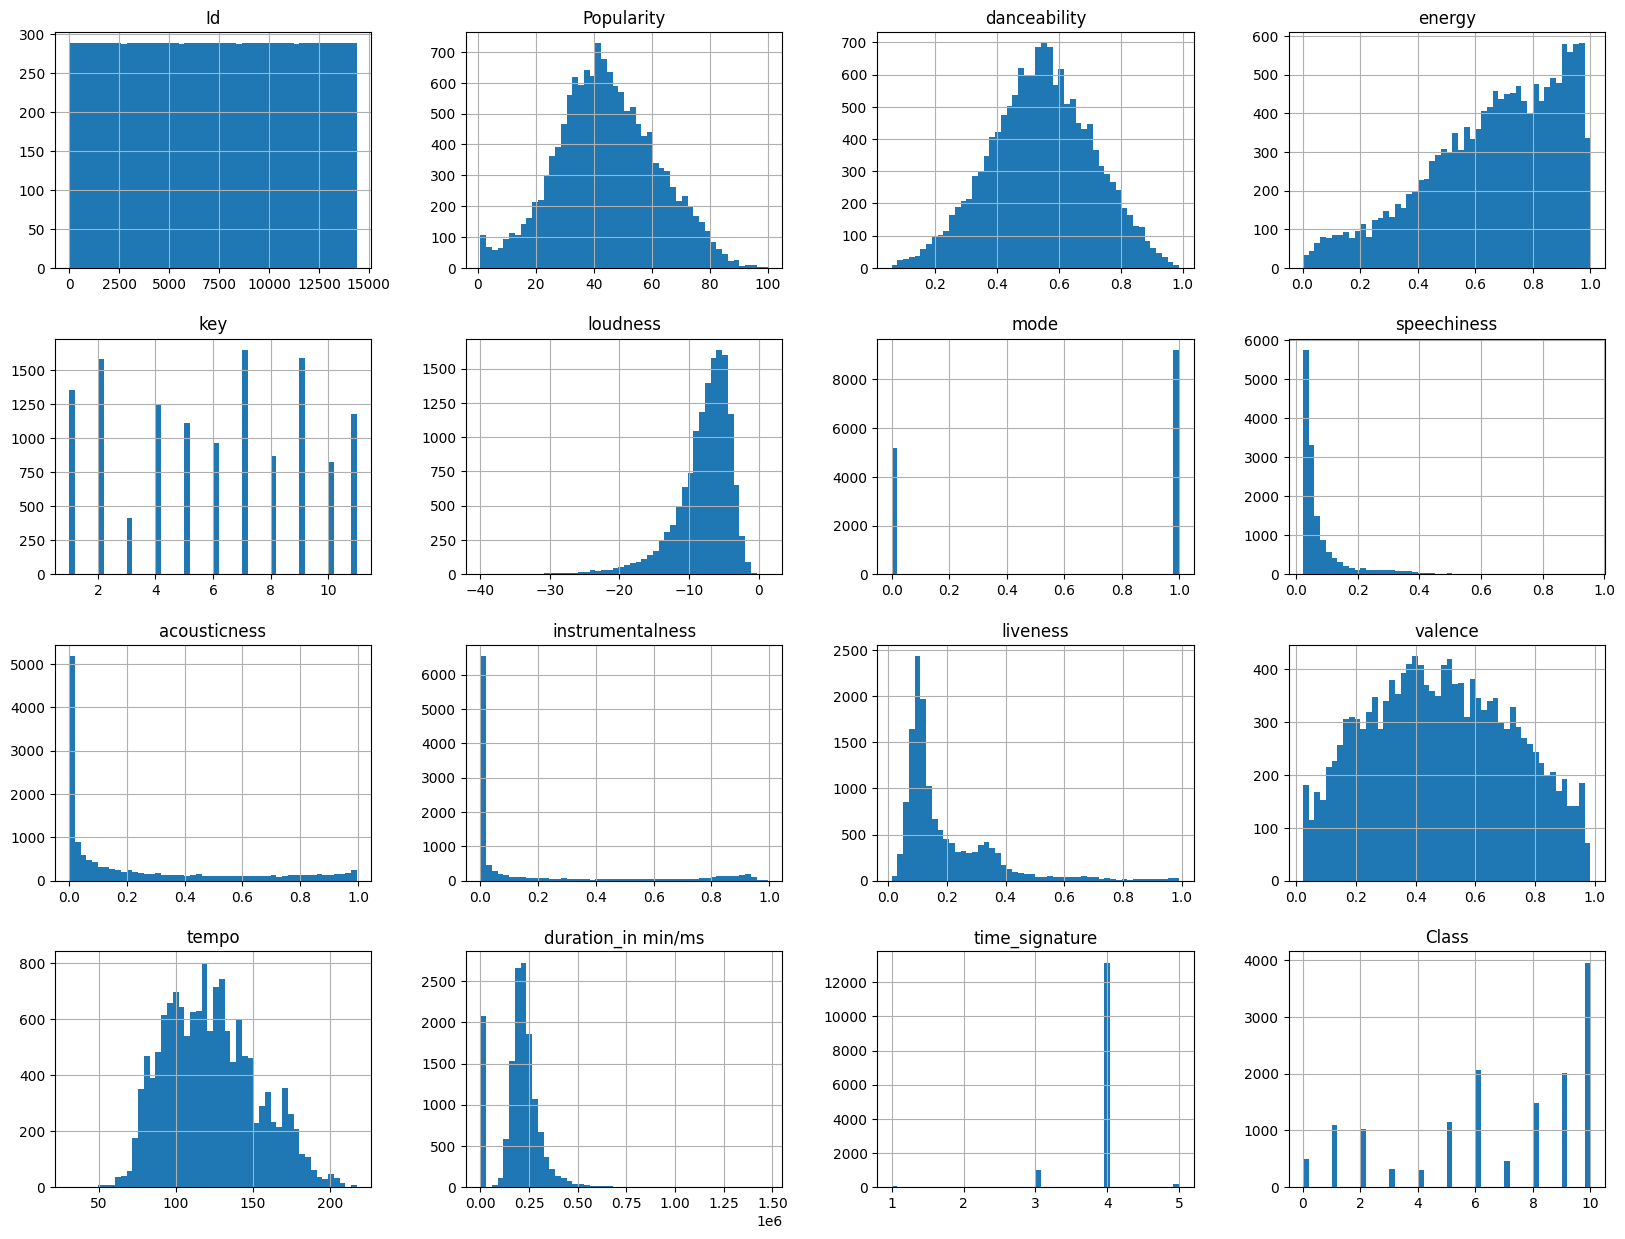

In [453]:
music.hist(bins=50, figsize=(20,15))
plt.show()

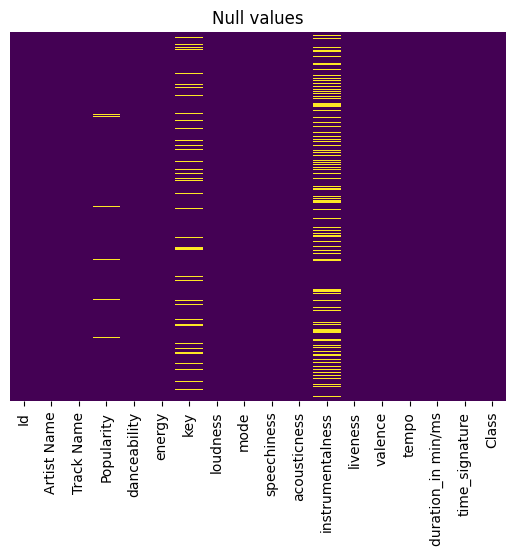

In [454]:
sns.heatmap(music.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.title('Null values')
plt.show()

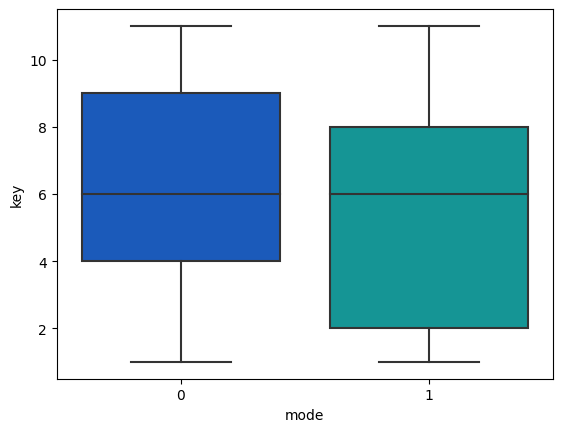

In [455]:
sns.boxplot(x='mode',y='key',data=music,palette='winter')
plt.show()

###Prepare the data

In [456]:
music.drop(columns=['Id'],axis=1,inplace=True)

In [457]:
music['Popularity'].fillna(music['Popularity'].median(),inplace=True)

In [458]:
music['instrumentalness'].fillna(music['instrumentalness'].median(),inplace=True)

In [459]:
def impute_key(cols):
    key = cols[0]
    mode = cols[1]

    if pd.isnull(key):

        if mode == 0:
            return 9

        else:
            return 8

    else:
        return key

In [460]:
music['key'] = music[['key','mode']].apply(impute_key,axis=1)

In [461]:
music_copy = music.copy()
music_copy.drop(columns=['Artist Name','Track Name'],axis=1,inplace=True)

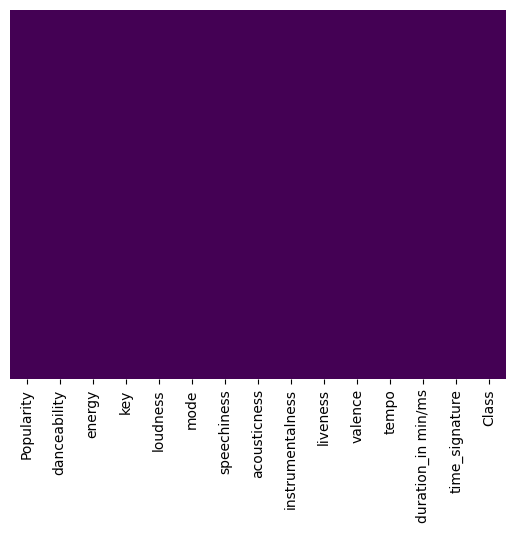

In [462]:
sns.heatmap(music_copy.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

In [463]:
music['new1']=music['danceability'] - music['energy']
music['new2']=music['liveness'] - music['energy']
music['new3']=music['tempo']-music['energy']

In [464]:
cat_cols = ['Artist Name', 'Track Name']

In [465]:
x,y=music.drop(columns=['Class'],axis=1),music['Class']

In [466]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20,
                                                    random_state=42,stratify= y)

In [468]:
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train.drop(columns=cat_cols,axis=1))

x_test_scaled = scaler.transform(x_test.drop(columns=cat_cols,axis=1))

###Select and Train a Model

####VotingClassifier

In [ ]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(x_train_scaled,y_train )

SGDClassifier(random_state=42)

In [ ]:
predictions = sgd_clf.predict(x_train_scaled)

In [ ]:
print(classification_report(y_train,predictions,zero_division=0))

              precision    recall  f1-score   support

           0       0.52      0.65      0.57       400
           1       0.07      0.01      0.01       878
           2       0.26      0.20      0.23       814
           3       0.63      0.72      0.67       258
           4       0.45      0.45      0.45       248
           5       0.52      0.77      0.62       926
           6       0.25      0.45      0.32      1655
           7       0.94      0.90      0.92       369
           8       0.78      0.21      0.33      1186
           9       0.27      0.11      0.16      1615
          10       0.46      0.58      0.51      3167

    accuracy                           0.42     11516
   macro avg       0.47      0.46      0.44     11516
weighted avg       0.42      0.42      0.38     11516



In [ ]:
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))
ovo_clf.fit(x_train_scaled,y_train)

OneVsOneClassifier(estimator=SGDClassifier(random_state=42))

In [ ]:
predictions = ovo_clf.predict(x_train_scaled)

In [ ]:
print(classification_report(y_train,predictions,zero_division=0))

              precision    recall  f1-score   support

           0       0.56      0.75      0.64       400
           1       0.07      0.00      0.01       878
           2       0.46      0.21      0.28       814
           3       0.74      0.49      0.59       258
           4       0.54      0.48      0.51       248
           5       0.67      0.64      0.65       926
           6       0.34      0.28      0.31      1655
           7       0.91      0.91      0.91       369
           8       0.54      0.49      0.51      1186
           9       0.44      0.44      0.44      1615
          10       0.44      0.67      0.53      3167

    accuracy                           0.48     11516
   macro avg       0.52      0.49      0.49     11516
weighted avg       0.45      0.48      0.45     11516



In [ ]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(x_train_scaled, y_train)

KNeighborsClassifier()

In [ ]:
predictions = knn_clf.predict(x_train_scaled)

In [ ]:
print(classification_report(y_train,predictions,zero_division=0))

              precision    recall  f1-score   support

           0       0.65      0.80      0.72       400
           1       0.36      0.36      0.36       878
           2       0.55      0.57      0.56       814
           3       0.83      0.71      0.77       258
           4       0.67      0.70      0.68       248
           5       0.74      0.74      0.74       926
           6       0.51      0.47      0.49      1655
           7       0.89      0.92      0.90       369
           8       0.62      0.68      0.65      1186
           9       0.61      0.59      0.60      1615
          10       0.62      0.62      0.62      3167

    accuracy                           0.60     11516
   macro avg       0.64      0.65      0.64     11516
weighted avg       0.60      0.60      0.60     11516



In [ ]:
estimatores = []
estimatores.append(('sgd',sgd_clf))
estimatores.append(('ovo',ovo_clf))
estimatores.append(('knn',knn_clf))

vot_clf = VotingClassifier(estimatores)

In [ ]:
scores = cross_val_score(vot_clf, x_train_scaled, y_train, scoring ="accuracy",cv = 10)
scores.mean()

0.4567531102181677

####Boosting Classifier

#####AdaBoostClassifier

In [ ]:
ada_clf = AdaBoostClassifier(random_state=7)

In [ ]:
ada_clf.fit(x_train_scaled,y_train)

AdaBoostClassifier(random_state=7)

In [ ]:
scores = cross_val_score(ada_clf, x_train_scaled, y_train, scoring ="accuracy",cv = 10)
scores.mean()

0.39683593372912446

#####GradientBoostingClassifier

In [ ]:
gradient_clf = GradientBoostingClassifier(random_state=42)

In [ ]:
scores = cross_val_score(gradient_clf, x_train_scaled, y_train, scoring ="accuracy",cv = 10)
scores.mean()

0.5386421227917754

#####XGBClassifier

In [ ]:
XGB_clf = XGBClassifier(n_estimators = 30,random_state = 7)

In [ ]:
scores = cross_val_score(XGB_clf, x_train_scaled, y_train, scoring ="accuracy",cv = 10)
scores.mean()

0.5392502896032435

#####CatBoostClassifier

In [473]:
cat_clf = CatBoostClassifier(n_estimators=100, depth =6 ,learning_rate=0.05, random_state=7
                             , eval_metric= 'MultiClass', cat_features=cat_cols, verbose=False)

In [474]:
scores = cross_val_score(cat_clf, x_train, y_train, scoring ="accuracy",cv = 10)
scores.mean()

0.637112580244232

####Bagging Classifier

#####Bagging Tree Classifier

In [ ]:
tree_clf = DecisionTreeClassifier()
bag_tree_clf = BaggingClassifier(estimator=tree_clf)

In [ ]:
scores = cross_val_score(bag_tree_clf, x_train_scaled, y_train, scoring ="accuracy",cv = 10)
scores.mean()

0.46405171529587796

#####RandomForestClassifier

In [ ]:
forest_clf = RandomForestClassifier(random_state=42)

In [ ]:
scores = cross_val_score(forest_clf, x_train_scaled, y_train, scoring ="accuracy",cv = 10)
scores.mean()

0.5135470967274832

###hyperparameter tuning

In [476]:

param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'depth': [4, 6, 8],
    'n_estimators': [500, 1000, 1500 ]

    }

random_search = RandomizedSearchCV(estimator=cat_clf, param_distributions=param_grid, n_iter=5, cv=5, scoring='accuracy')
random_search.fit(x_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=<catboost.core.CatBoostClassifier object at 0x7806ccea2530>,
                   n_iter=5,
                   param_distributions={'depth': [4, 6, 8],
                                        'learning_rate': [0.01, 0.05, 0.1],
                                        'n_estimators': [500, 1000, 1500]},
                   scoring='accuracy')

In [477]:
print(" Results from Grid Search " )
print("\n The best score across ALL searched params:\n",random_search.best_score_)
print("\n The best parameters across ALL searched params:\n",random_search.best_params_)

 Results from Grid Search 

 The best score across ALL searched params:
 0.658127495235683

 The best parameters across ALL searched params:
 {'n_estimators': 1000, 'learning_rate': 0.05, 'depth': 4}


In [478]:
cv_results = random_search.cv_results_

for mean_score, params in zip(cv_results['mean_test_score'], cv_results['params']):
    print(mean_score,params)

0.6372865103488203 {'n_estimators': 1000, 'learning_rate': 0.01, 'depth': 4}
0.6534393921575723 {'n_estimators': 500, 'learning_rate': 0.1, 'depth': 4}
0.6547403070270662 {'n_estimators': 500, 'learning_rate': 0.1, 'depth': 6}
0.6334657089786269 {'n_estimators': 500, 'learning_rate': 0.01, 'depth': 6}
0.658127495235683 {'n_estimators': 1000, 'learning_rate': 0.05, 'depth': 4}


In [479]:
final_model = random_search.best_estimator_

In [256]:
y_train_pred = cross_val_predict(final_model, x_train, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred, )
conf_mx

array([[ 325,    0,    0,   10,   22,    0,    2,   18,    0,   14,    9],
       [   0,  121,   32,    0,    0,   28,  207,    2,   27,   63,  398],
       [   0,    1,  486,    0,    0,   18,   66,    0,    8,   50,  185],
       [  35,    0,    0,  201,   11,    1,    0,    2,    0,    4,    4],
       [  34,    0,    0,    7,  190,    0,    0,    1,    0,   14,    2],
       [   0,    1,    8,    0,    0,  728,   44,    0,    1,  114,   30],
       [   0,    6,   49,    1,    0,   62,  761,    1,   62,  134,  579],
       [  19,    0,    0,    3,    0,    1,    1,  345,    0,    0,    0],
       [   0,    4,    3,    0,    0,    1,   38,    0,  809,    5,  326],
       [  13,   20,   38,    6,   11,  129,  126,    1,    4,  991,  276],
       [   6,   34,  105,    2,   11,   24,  222,    0,  236,  131, 2396]])

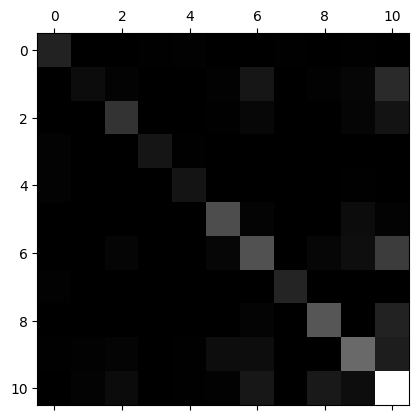

In [257]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

###Evaluation

In [480]:
final_predictions = final_model.predict(x_test)

In [481]:
print(classification_report(y_test,final_predictions,zero_division=0))

              precision    recall  f1-score   support

           0       0.81      0.84      0.82       100
           1       0.55      0.17      0.26       220
           2       0.67      0.69      0.68       204
           3       0.87      0.86      0.87        64
           4       0.78      0.84      0.81        62
           5       0.81      0.84      0.83       231
           6       0.54      0.52      0.53       414
           7       0.97      0.95      0.96        92
           8       0.69      0.71      0.70       297
           9       0.71      0.66      0.69       404
          10       0.63      0.76      0.69       792

    accuracy                           0.68      2880
   macro avg       0.73      0.71      0.71      2880
weighted avg       0.67      0.68      0.66      2880



###Evaluation (test.csv)

In [486]:
test_data = pd.read_csv('/content/test (2).csv')

In [487]:
Id = test_data['Id']
test_data = test_data.drop(['Id'],axis=1)

In [488]:
test_data['Popularity'].fillna(test_data['Popularity'].median(),inplace=True)
test_data['instrumentalness'].fillna(test_data['instrumentalness'].median(),inplace=True)
test_data['key'] = test_data[['key','mode']].apply(impute_key,axis=1)

In [489]:
test_data['new1']=test_data['danceability'] - test_data['energy']
test_data['new2']=test_data['liveness'] - test_data['energy']
test_data['new3']=test_data['tempo']-test_data['energy']

In [490]:
final_predictions = final_model.predict(test_data)

In [491]:
sub = pd.DataFrame(final_predictions,columns=['Class'])
sub.insert(0,'Id',Id)

In [492]:
sub.to_csv('sub.csv',index=False)